In [30]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4147, 784)
(4147, 1)
(1037, 784)
(1037, 1)
(3317, 784)
(3317, 1)
(830, 784)
(830, 1)
Epoch 1/10
104/104 [==============================] - 1s 6ms/step - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0527 - val_accuracy: 0.9855
Epoch 2/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0396 - accuracy: 0.9891 - val_loss: 0.0491 - val_accuracy: 0.9880
Epoch 3/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0325 - accuracy: 0.9928 - val_loss: 0.0617 - val_accuracy: 0.9795
Epoch 4/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0237 - accuracy: 0.9970 - val_loss: 0.0508 - val_accuracy: 0.9855
Epoch 5/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0179 - accuracy: 0.9976 - val_loss: 0.0502 - val_accuracy: 0.9855
Epoch 6/10
104/104 [==============================] - 0s 4ms/step - loss: 0

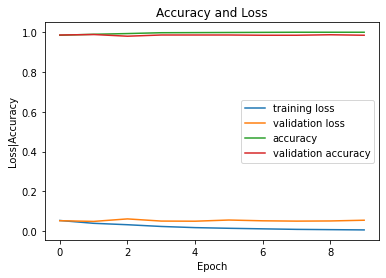

[0.05485441908240318, 0.9816778898239136]
Giá trị dự đoán:  0


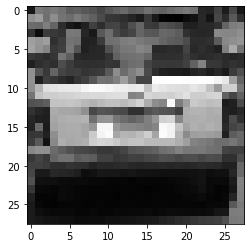

In [32]:
from google.colab.patches import cv2_imshow
import cv2
%run /content/drive/MyDrive/CNN.ipynb

In [ ]:
backSub = cv2.createBackgroundSubtractorMOG2()

capture = cv2.VideoCapture('/content/drive/MyDrive/AI/human_NN/in.avi')

while True:
    _, frame = capture.read()
    if not _:
        break

    fgMask = backSub.apply(frame)
    fgMask = cv2.cvtColor(fgMask, 0)

    kernel = np.ones((5, 5), np.uint8)
    fgMask = cv2.erode(fgMask, kernel, iterations=1)
    fgMask = cv2.dilate(fgMask, kernel, iterations=1)
    fgMask = cv2.GaussianBlur(fgMask, (3, 3), 0)
    fgMask = cv2.morphologyEx(fgMask, cv2.MORPH_CLOSE, kernel)
    _, fgMask = cv2.threshold(fgMask, 130, 255, cv2.THRESH_BINARY)

    fgMask = cv2.Canny(fgMask, 20, 200)
    contours, _ = cv2.findContours(fgMask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for i in range(len(contours)):
        (x, y, w, h) = cv2.boundingRect(contours[i])
        area = cv2.contourArea(contours[i])

        if area > 200:
            cv2.drawContours(fgMask, contours[i], 0, (0, 0, 255), 6)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            object = frame_gray[y:y+h, x:x+w]
            y_predict = cv2.resize(object, (64, 64)).reshape(1, -1) / 255

            if np.argmax(y_predict):
                cv2.putText(frame, "Human", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
            else:
                cv2.putText(frame, "Non_Human", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    cv2_imshow(frame)
    keyboard = cv2.waitKey(30)

    if keyboard == 'q' or keyboard == 30:
        break
